## Create DS

In [19]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification

# NP equivilant of random state
np.random.seed(123)

# Return numbers spaced evenly on a log scale
# Gives the features different scales and makes a more interesting dataset
scale_values = np.logspace(1, 5, num=500)

# Create the X and y values for the DataFrame
X, y = make_classification(n_samples=5000, 
                           n_features=500, 
                           n_informative=280,
                           n_redundant=180, 
                           n_repeated=3, 
                           n_classes=6, 
                           flip_y=0.1,
                           weights=[0.1, 0.2, 0.15, 0.25, 0.05], 
                           n_clusters_per_class=1, 
                           scale = scale_values, 
                           random_state=42)

# Make the created values into DataFrames
X = pd.DataFrame(X)
y = pd.DataFrame(y)

# Rename the columns 
X = X.add_prefix("feature_")
y.rename(columns={0:"label"}, inplace=True)

# Bring X and y together to view our DF as a whole
codealong_df = pd.concat([X, y], axis=1)

In [20]:
y.label.sort_values().unique()

array([0, 1, 2, 3, 4, 5])

## Split

In [21]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(codealong_df,
                                       test_size=0.2,
                                       random_state=123)

X_train = train_set.drop(columns="label").copy()
y_train = train_set["label"].copy()

X_test = test_set.drop(columns="label").copy()
y_test = test_set["label"].copy()

## Pipeline No PCA

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [24]:
import time
start_time = time.time()

pipe_nopca = make_pipeline(StandardScaler(),
                           KNeighborsClassifier())

param_grid = {"kneighborsclassifier__n_neighbors": list(range(3, 30))}

search_nopca = RandomizedSearchCV(pipe_nopca,
                                   param_grid,
                                   scoring="accuracy",
                                   n_iter=50,
                                   cv=5,
                                   n_jobs=-1,
                                   random_state=123)

search_nopca.fit(X_train, y_train)

end_time = time.time()
time_taken_no_pca = end_time - start_time

best_score_no_pca = search_nopca.best_score_

print("--- %s seconds ---" % (time_taken_no_pca))
print(f"{round(best_score_no_pca * 100, 2)}% accuracy")

--- 207.05047059059143 seconds ---
80.85% accuracy


## Explore PCA

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10) # pick number of components 
X_reduced = pca.fit_transform(X_train)

In [27]:
X.shape

(5000, 500)

In [28]:
X_reduced.shape

(4000, 10)

## Pipeline with PCA

### n_component = 10

In [29]:
start_time = time.time()
model_pipeline = make_pipeline(StandardScaler(),
                               PCA(n_components=10),
                               KNeighborsClassifier()
)

parameters = {
    "kneighborsclassifier__n_neighbors":range(3,30),
    "kneighborsclassifier__weights":["uniform", "distance"],
    "kneighborsclassifier__p":[1,2]
}
neigh2_search = RandomizedSearchCV(model_pipeline,
                                   param_grid,
                                   scoring="accuracy",
                                   n_iter=50,
                                   cv=5,
                                   n_jobs=-1,
                                   random_state=123)

neigh2_search.fit(X_train, y_train)

end_time = time.time()

time_taken_10_pca = end_time - start_time
best_score_10_pca = neigh2_search.best_score_

print("--- %s seconds ---" % (time_taken_10_pca))
print(f"{round(best_score_10_pca * 100, 2)}% accuracy")

--- 59.45748019218445 seconds ---
29.78% accuracy


### n_component by variance

In [36]:
pca = PCA(n_components=None)
pca.fit(X_train)

# np.round(pca.explained_variance_ratio_, 4)*100
np.round(pca.explained_variance_ratio_,4)*100

array([5.54, 4.85, 4.19, 4.  , 3.75, 3.52, 3.28, 3.24, 3.03, 2.83, 2.79,
       2.5 , 2.38, 2.3 , 2.23, 2.08, 1.96, 1.88, 1.82, 1.78, 1.73, 1.66,
       1.54, 1.47, 1.42, 1.37, 1.31, 1.24, 1.19, 1.17, 1.12, 1.09, 1.01,
       0.96, 0.92, 0.89, 0.86, 0.81, 0.81, 0.78, 0.73, 0.69, 0.66, 0.63,
       0.6 , 0.57, 0.56, 0.55, 0.52, 0.49, 0.46, 0.43, 0.42, 0.4 , 0.38,
       0.37, 0.35, 0.34, 0.33, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.25, 0.24,
       0.23, 0.21, 0.21, 0.2 , 0.19, 0.19, 0.18, 0.17, 0.16, 0.15, 0.15,
       0.14, 0.14, 0.13, 0.12, 0.12, 0.12, 0.11, 0.1 , 0.1 , 0.1 , 0.09,
       0.08, 0.08, 0.08, 0.07, 0.07, 0.07, 0.07, 0.07, 0.06, 0.06, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.03,
       0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.

(0.0, 125.0)

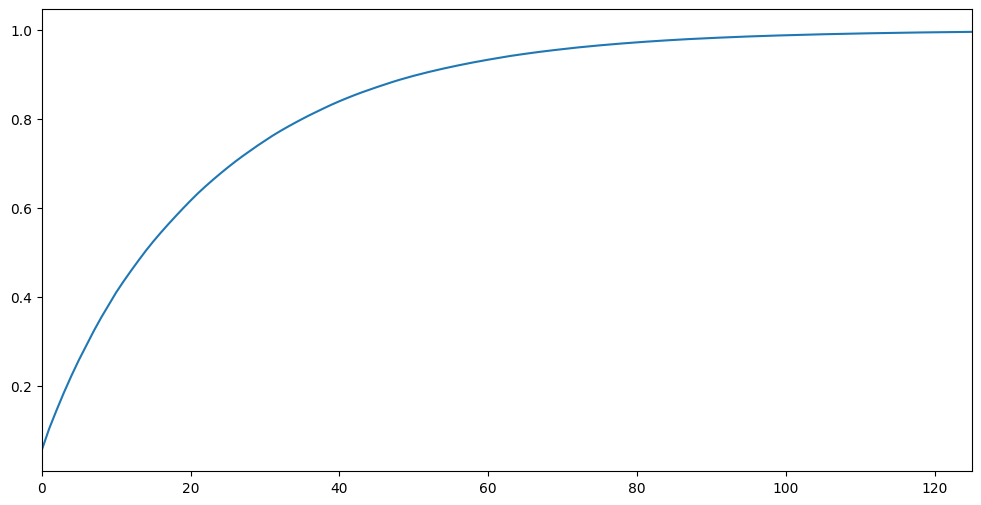

In [40]:
import matplotlib.pyplot as plt

cumsum = np.cumsum(pca.explained_variance_ratio_)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(cumsum, label = "Explained variance");
plt.xlim(0,125)

In [39]:
sum(cumsum < 0.95)

67

In [41]:
model_pipeline = make_pipeline(StandardScaler(),
                               PCA(n_components=0.999)
)

model_pipeline.fit(X_train, y_train)

model_pipeline.

AttributeError: 'Pipeline' object has no attribute 'best_score_'